In [150]:
import os # Operating System
import pandas as pd # Panel Data
import geopandas as gpd # For GIS Analysis
from shapely.geometry import point # Allows the creation of gpkg files from xy data
import numpy as np # Numerical Python
from matplotlib import pyplot as plt # For Plotting
from sklearn.model_selection import train_test_split # Scikit to Perform Logistic Regression
from scipy import stats as sp

In [16]:
#!pip install matplotlib_map_utils # North Arrow
#!pip install numpy==1.25.0

In [17]:
# Set the Working Directory
path = 'C:/HassamAssignment1'
os.chdir(path)  # Change directory function

In [18]:
#we need to load data in csv format with low_memory=False to avoid dtypewarning
TX22 = pd.read_csv('C:/HassamAssignment1/NBITX2022.csv', low_memory=False)
TX23 = pd.read_csv('C:/HassamAssignment1/NBITX2023.csv', low_memory=False)

In [130]:
#Load Geopackage file
conus_gpkg = gpd.read_file(os.path.join(path, 'COUNTY.gpkg'))

In [142]:
fname1 = 'TexasMap.gpkg'
fname2 = 'Conus_83.gpkg'
TEXAS = gpd.read_file(fname1)
conus = gpd.read_file(fname2)
conus.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"MULTIPOLYGON (((-104.05351 41.15726, -104.0526..."
1,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-122.32834 48.02134, -122.3217..."
2,35,00897535,0400000US35,35,NM,New Mexico,00,314196306401,728776523,"MULTIPOLYGON (((-109.05017 31.48000, -109.0498..."
3,46,01785534,0400000US46,46,SD,South Dakota,00,196346981786,3382720225,"MULTIPOLYGON (((-104.05770 44.99743, -104.0502..."
4,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-106.64548 31.89867, -106.6408..."


NameError: name 'mapu' is not defined

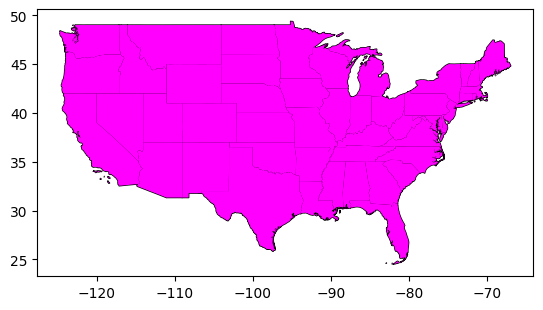

In [146]:
fig = plt.figure()
ax1 = fig.add_subplot() 
conus.plot (facecolor='none', edgecolor='black', ax=ax1)
TEXAS.plot(ax=ax1, color='magenta', markersize=1)
mapu.north_arrow.north_arrow(ax=ax1, location='lower right', rotation={'degrees':0}) 
ax1.set_xlabel('Longitude (NAD 83)')
ax1.set_ylabel('Latitude (NAD 83)')
plt.grid()
plt.title ('Bridges Surveyed in Year 2023')
plt.show()

In [20]:
# Extract the parameters of TX23 that are not in TX22:
NEW_TX23 = TX23[~TX23['STRUCTURE_NUMBER_008'].isin(TX22['STRUCTURE_NUMBER_008'])]

In [21]:
# Save the new dataframe IN CSV format:
NEW_TX23.to_csv('NEWTX23.csv')
print("New CSV file (NEWTX23.csv) created successfully.")

New CSV file (NEWTX23.csv) created successfully.


In [22]:
len(NEW_TX23) # Defines number of items in the object

982

In [23]:
#Now, Extract the parameters of TX22 that are not in TX23:
NEW_TX22 = TX22[~TX22['STRUCTURE_NUMBER_008'].isin(TX23['STRUCTURE_NUMBER_008'])]

In [24]:
#Save the new dataframe in CSV format:
NEW_TX22.to_csv('NEWTX22.csv')
print("New CSV file (NEWTX22.csv) created successfully.")

New CSV file (NEWTX22.csv) created successfully.


In [25]:
len(NEW_TX22) # Defines number of items in the object 

369

In [26]:
# Load the CSV file:
df = pd.read_csv('NEWTX23.csv')

# Display the column names:
print(df.columns.tolist()) # for converting iterable data into Data Structure

['Unnamed: 0', 'STATE_CODE_001', 'STRUCTURE_NUMBER_008', 'RECORD_TYPE_005A', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'ROUTE_NUMBER_005D', 'DIRECTION_005E', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'PLACE_CODE_004', 'FEATURES_DESC_006A', 'CRITICAL_FACILITY_006B', 'FACILITY_CARRIED_007', 'LOCATION_009', 'MIN_VERT_CLR_010', 'KILOPOINT_011', 'BASE_HWY_NETWORK_012', 'LRS_INV_ROUTE_013A', 'SUBROUTE_NO_013B', 'LAT_016', 'LONG_017', 'DETOUR_KILOS_019', 'TOLL_020', 'MAINTENANCE_021', 'OWNER_022', 'FUNCTIONAL_CLASS_026', 'YEAR_BUILT_027', 'TRAFFIC_LANES_ON_028A', 'TRAFFIC_LANES_UND_028B', 'ADT_029', 'YEAR_ADT_030', 'DESIGN_LOAD_031', 'APPR_WIDTH_MT_032', 'MEDIAN_CODE_033', 'DEGREES_SKEW_034', 'STRUCTURE_FLARED_035', 'RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'HISTORY_037', 'NAVIGATION_038', 'NAV_VERT_CLR_MT_039', 'NAV_HORR_CLR_MT_040', 'OPEN_CLOSED_POSTED_041', 'SERVICE_ON_042A', 'SERVICE_UND_042B', 'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_0

In [27]:
!pip install scikit- # For Logistic Regression

ERROR: Invalid requirement: 'scikit-'


In [28]:
# Select the columns that are required:
selected_columns = [
    'MAINTENANCE_021', 'HIGHWAY_DISTRICT_002', 'YEAR_BUILT_027', 'ADT_029', 
    'YEAR_ADT_030', 'MEMBRANE_TYPE_108B', 'SURFACE_TYPE_108A', 'DECK_STRUCTURE_TYPE_107',
    'YEAR_RECONSTRUCTED_106',
    'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068', 'INVENTORY_RATING_066',
    'OPERATING_RATING_064', 'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B',
    'MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 
    'DECK_WIDTH_MT_052', 'DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060','CHANNEL_COND_061', 'CULVERT_COND_062']

# Select the required columns from the DataFrame
selected_data = df[selected_columns]

# Display the first few rows of the selected data
print(selected_data.head())
selected_data.to_csv('selected_columns_data.csv', index=False)

   MAINTENANCE_021  HIGHWAY_DISTRICT_002  YEAR_BUILT_027  ADT_029  \
0               63                     2            2018        0   
1                2                     1            2022       40   
2                1                     1            2022    55900   
3                1                     1            2022    55900   
4                1                     1            2022    54500   

   YEAR_ADT_030 MEMBRANE_TYPE_108B SURFACE_TYPE_108A DECK_STRUCTURE_TYPE_107  \
0          2021                  0                 1                       1   
1          2010                  0                 0                       1   
2          2020                  0                 0                       1   
3          2020                  0                 0                       1   
4          2020                  0                 0                       1   

   YEAR_RECONSTRUCTED_106 STRUCTURAL_EVAL_067  ... STRUCTURE_TYPE_043B  \
0                     0.0     

In [29]:
# We need to separate training set and testing data:

In [30]:
#checking all the unique data in each column (Got help from Chatgpt)
for i in selected_columns:
    print(i,selected_data[i].unique());
    

MAINTENANCE_021 [63  2  1  4  3 32 31 40 25 64 26 74 56]
HIGHWAY_DISTRICT_002 [ 2  1  3  4  6  7  8  0  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
YEAR_BUILT_027 [2018 2022 2021 1994 1990 2019 2005 2017 2011 2000 1980 2010 2004 2016
 2015 2014 2020 1985 2007 2008 2013 1914 1968 1995 1986 1974 1992 1999
 2001 2002 1998 2006 1997 2003 2009 1960 1967 2012 1957 1975 1989 1987
 1969 2023 1945 1988 1993]
ADT_029 [     0     40  55900  54500   7050   8450     88     41  12900    210
    160    135    100    294   4600    891   1759     75    300   2800
     30   1300    500   5417    288   4400    750   1800  18680   7361
   1090     50    388   1000    200    250    150   2500   5000    110
  13200   6600  12800   4300   3800  51476   5400  46524  66684  67897
  30000   9663  10352   3000  10000  20000  35000  71926  22300  13700
  10143  11055  22287  18300    473   5376   1113   6445   3505   2496
   3896   4363   7603    800   6800   7932   6819   2318  13194   1931
  20521   763

In [31]:
selected_data.replace('N', 0, inplace=True) # Chatgpt

C:\Users\demon\AppData\Local\Temp\ipykernel_2876\525387625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.replace('N', 0, inplace=True) # Chatgpt


In [32]:
selected_data.head(20)

,MAINTENANCE_021,HIGHWAY_DISTRICT_002,YEAR_BUILT_027,ADT_029,YEAR_ADT_030,MEMBRANE_TYPE_108B,SURFACE_TYPE_108A,DECK_STRUCTURE_TYPE_107,YEAR_RECONSTRUCTED_106,STRUCTURAL_EVAL_067,...,STRUCTURE_TYPE_043B,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062
0,63,2,2018,0,2021,0,1,1,0.0,8,...,2,14.9,16.2,7.4,7.9,8,8,8,7,0
1,2,1,2022,40,2010,0,0,1,0.0,9,...,1,12.2,12.2,7.4,8.0,9,9,9,9,0
2,1,1,2022,55900,2020,0,0,1,0.0,8,...,2,25.0,61.6,7.3,22.8,9,9,8,0,0
3,1,1,2022,55900,2020,0,0,1,0.0,8,...,2,25.0,61.6,7.3,22.2,9,9,8,0,0
4,1,1,2022,54500,2020,0,0,1,0.0,9,...,2,36.6,759.9,26.8,27.4,9,9,9,9,0
5,1,1,2022,54500,2020,0,0,1,0.0,9,...,2,36.7,759.9,27.7,28.3,9,9,9,0,0
6,1,1,2022,7050,2020,0,0,1,0.0,9,...,2,32.6,163.0,7.9,8.5,9,9,9,9,0
7,1,1,2022,8450,2020,0,0,1,0.0,7,...,2,31.9,179.4,7.9,8.5,9,9,7,7,0
8,2,1,2021,88,2020,0,0,1,0.0,7,...,2,22.9,22.9,7.3,7.9,8,8,7,8,0
9,2,1,2022,41,2020,0,1,1,0.0,9,...,2,12.2,12.2,7.3,7.9,8,9,9,7,0


In [33]:
#checking all the unique data in each column
for i in selected_columns:
    print(i,selected_data[i].unique());

MAINTENANCE_021 [63  2  1  4  3 32 31 40 25 64 26 74 56]
HIGHWAY_DISTRICT_002 [ 2  1  3  4  6  7  8  0  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
YEAR_BUILT_027 [2018 2022 2021 1994 1990 2019 2005 2017 2011 2000 1980 2010 2004 2016
 2015 2014 2020 1985 2007 2008 2013 1914 1968 1995 1986 1974 1992 1999
 2001 2002 1998 2006 1997 2003 2009 1960 1967 2012 1957 1975 1989 1987
 1969 2023 1945 1988 1993]
ADT_029 [     0     40  55900  54500   7050   8450     88     41  12900    210
    160    135    100    294   4600    891   1759     75    300   2800
     30   1300    500   5417    288   4400    750   1800  18680   7361
   1090     50    388   1000    200    250    150   2500   5000    110
  13200   6600  12800   4300   3800  51476   5400  46524  66684  67897
  30000   9663  10352   3000  10000  20000  35000  71926  22300  13700
  10143  11055  22287  18300    473   5376   1113   6445   3505   2496
   3896   4363   7603    800   6800   7932   6819   2318  13194   1931
  20521   763

In [34]:
#changing data type as integers.
features1=['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060','CHANNEL_COND_061']
for i in features1:
    selected_data[i].astype(int) # Chatgpt

In [35]:
for i in features1:
    selected_data[i] = pd.to_numeric(selected_data[i], errors='coerce') # Chatgpt

C:\Users\demon\AppData\Local\Temp\ipykernel_2876\2313054397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[i] = pd.to_numeric(selected_data[i], errors='coerce') # Chatgpt


In [36]:
selected_data['DECK_COND_058'].head(100)

0     8
1     9
2     9
3     9
4     9
     ..
95    0
96    9
97    8
98    7
99    7
Name: DECK_COND_058, Length: 100, dtype: int64

In [37]:
for i in features1:
    selected_data[i] = selected_data[i].apply(lambda x: 1 if (x >5) else 0) # Chatgpt

C:\Users\demon\AppData\Local\Temp\ipykernel_2876\3758725807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[i] = selected_data[i].apply(lambda x: 1 if (x >5) else 0) # Chatgpt


In [38]:
selected_data['DECK_COND_058'].head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    0
96    1
97    1
98    1
99    1
Name: DECK_COND_058, Length: 100, dtype: int64

In [39]:
selected_data['DECK_COND_058'].unique

<bound method Series.unique of 0      1
1      1
2      1
3      1
4      1
      ..
977    1
978    1
979    0
980    0
981    0
Name: DECK_COND_058, Length: 982, dtype: int64>

In [40]:
selected_data["CULVERT_COND_062"].head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    7
96    0
97    0
98    0
99    0
Name: CULVERT_COND_062, Length: 100, dtype: object

In [41]:
selected_data["CULVERT_COND_062"].astype(int)
selected_data['CULVERT_COND_062'] = pd.to_numeric(selected_data['CULVERT_COND_062'], errors='coerce')

C:\Users\demon\AppData\Local\Temp\ipykernel_2876\2313925100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['CULVERT_COND_062'] = pd.to_numeric(selected_data['CULVERT_COND_062'], errors='coerce')


In [42]:
selected_data["CULVERT_COND_062"].head(100)

0     0
1     0
2     0
3     0
4     0
     ..
95    7
96    0
97    0
98    0
99    0
Name: CULVERT_COND_062, Length: 100, dtype: int64

In [43]:
selected_data["CULVERT_COND_062"] = selected_data["CULVERT_COND_062"].apply(lambda x: 1 if (x >6) else 0)

C:\Users\demon\AppData\Local\Temp\ipykernel_2876\745371590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["CULVERT_COND_062"] = selected_data["CULVERT_COND_062"].apply(lambda x: 1 if (x >6) else 0)


In [44]:
selected_data["CULVERT_COND_062"].unique

<bound method Series.unique of 0      0
1      0
2      0
3      0
4      0
      ..
977    0
978    0
979    0
980    0
981    1
Name: CULVERT_COND_062, Length: 982, dtype: int64>

In [45]:
selected_data['STRUCTURAL_EVAL_067'].replace('*', 0, inplace=True)

C:\Users\demon\AppData\Local\Temp\ipykernel_2876\740611941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  selected_data['STRUCTURAL_EVAL_067'].replace('*', 0, inplace=True)
C:\Users\demon\AppData\Local\Temp\ipykernel_2876\740611941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['STRUCTURAL_EVAL_067'].replace('*', 0, inp

In [86]:
selected_data['STRUCTURAL_EVAL_067'].unique

<bound method Series.unique of 0      8
1      9
2      8
3      8
4      9
      ..
977    9
978    6
979    5
980    6
981    7
Name: STRUCTURAL_EVAL_067, Length: 982, dtype: object>

In [46]:
selected_data['STRUCTURAL_EVAL_067'].astype(int)

0      8
1      9
2      8
3      8
4      9
      ..
977    9
978    6
979    5
980    6
981    7
Name: STRUCTURAL_EVAL_067, Length: 982, dtype: int32

In [47]:
selected_data[selected_columns].head(100)

,MAINTENANCE_021,HIGHWAY_DISTRICT_002,YEAR_BUILT_027,ADT_029,YEAR_ADT_030,MEMBRANE_TYPE_108B,SURFACE_TYPE_108A,DECK_STRUCTURE_TYPE_107,YEAR_RECONSTRUCTED_106,STRUCTURAL_EVAL_067,...,STRUCTURE_TYPE_043B,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,SUBSTRUCTURE_COND_060,CHANNEL_COND_061,CULVERT_COND_062
0,63,2,2018,0,2021,0,1,1,0.0,8,...,2,14.9,16.2,7.4,7.9,1,1,1,1,0
1,2,1,2022,40,2010,0,0,1,0.0,9,...,1,12.2,12.2,7.4,8.0,1,1,1,1,0
2,1,1,2022,55900,2020,0,0,1,0.0,8,...,2,25.0,61.6,7.3,22.8,1,1,1,0,0
3,1,1,2022,55900,2020,0,0,1,0.0,8,...,2,25.0,61.6,7.3,22.2,1,1,1,0,0
4,1,1,2022,54500,2020,0,0,1,0.0,9,...,2,36.6,759.9,26.8,27.4,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,2,2022,22287,2020,0,0,1,0.0,7,...,19,3.7,68.0,16.5,30.7,0,0,0,1,1
96,1,2,2017,13200,2015,0,0,2,0.0,8,...,2,26.5,94.5,28.0,32.6,1,1,1,0,0
97,1,2,2022,18300,2020,0,0,1,0.0,7,...,2,43.3,167.3,11.6,12.3,1,1,1,0,0
98,1,2,2021,5000,2020,0,0,1,0.0,7,...,2,41.1,82.3,21.9,26.5,1,1,1,0,0


In [88]:
# Load the CSV file
df = pd.read_csv('NEWTX22.csv')

# Select the relevant columns
selected_columns = [
    'MAINTENANCE_021', 'YEAR_BUILT_027', 'ADT_029', 
    'YEAR_ADT_030', 'MEMBRANE_TYPE_108B', 'SURFACE_TYPE_108A', 'DECK_STRUCTURE_TYPE_107',
    'YEAR_RECONSTRUCTED_106',
    'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068',
    'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B',
    'MAX_SPAN_LEN_MT_048','STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 
    'DECK_WIDTH_MT_052']

In [92]:
# Select the specified columns from the DataFrame
selected_data = df[selected_columns]

print(selected_data.head())

# Save the selected data to a CSV format
selected_data.to_csv('selected_columns_data.csv', index=False)

   MAINTENANCE_021  YEAR_BUILT_027  ADT_029  YEAR_ADT_030 MEMBRANE_TYPE_108B  \
0                2            1945       10          2010                  0   
1                2            1970       30          2010                  0   
2                2            1980       10          2010                  0   
3                2            1990       20          2010                  0   
4                2            1997       10          2010                  0   

  SURFACE_TYPE_108A DECK_STRUCTURE_TYPE_107  YEAR_RECONSTRUCTED_106  \
0                 9                       6                     0.0   
1                 0                       1                  1989.0   
2                 7                       8                     0.0   
3                 7                       8                     0.0   
4                 0                       8                     0.0   

   STRUCTURAL_EVAL_067 DECK_GEOMETRY_EVAL_068  STRUCTURE_KIND_043A  \
0                    3

In [94]:
import pandas as pd

# Assuming selected_data is your DataFrame
nan_columns = selected_data.columns[selected_data.isnull().any()].tolist()

print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [96]:
#Replace NaN values with 0
selected_data.fillna(0, inplace=True)

C:\Users\demon\AppData\Local\Temp\ipykernel_2876\337131779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data.fillna(0, inplace=True)


In [98]:
import pandas as pd

# Assuming selected_data is your DataFrame
nan_columns = selected_data.columns[selected_data.isnull().any()].tolist()

print("Columns with NaN values:", nan_columns)

Columns with NaN values: []


In [100]:
selected_data.replace(0, inplace=True)

C:\Users\demon\AppData\Local\Temp\ipykernel_2876\1075185612.py:1: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  selected_data.replace(0, inplace=True)


In [104]:
# Assuming selected_data is your DataFrame containing the data
features2 = [
    'MAINTENANCE_021',  'YEAR_BUILT_027', 'ADT_029', 
    'YEAR_ADT_030', 'MEMBRANE_TYPE_108B', 'SURFACE_TYPE_108A', 
    'DECK_STRUCTURE_TYPE_107', 'YEAR_RECONSTRUCTED_106',
    'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068', 
      'STRUCTURE_KIND_043A', 
    'STRUCTURE_TYPE_043B', 'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049', 
    'ROADWAY_WIDTH_MT_051', 'DECK_WIDTH_MT_052']

In [106]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Select features for training
X_train = new_tx23[['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060', 
                    'CHANNEL_COND_061', 'CULVERT_COND_062']]


# Select multiple target variables
y_train = new_tx23[['MAINTENANCE_021', 'YEAR_BUILT_027', 'ADT_029', 
                    'YEAR_ADT_030', 'MEMBRANE_TYPE_108B', 'SURFACE_TYPE_108A', 
                    'DECK_STRUCTURE_TYPE_107', 'YEAR_RECONSTRUCTED_106', 
                    'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068', 
                    'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 
                    'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049', 
                    'ROADWAY_WIDTH_MT_051', 'DECK_WIDTH_MT_052']]

# Initialize and fit a multi-output regressor
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

NameError: name 'new_tx23' is not defined

In [108]:
# Select features and target for training

X_train = new_tx23[['DECK_COND_058', 'SUPERSTRUCTURE_COND_059', 'SUBSTRUCTURE_COND_060', 
                   'CHANNEL_COND_061', 'CULVERT_COND_062']]


y_train = new_tx23['MAINTENANCE_021',  'YEAR_BUILT_027', 'ADT_029', 
    'YEAR_ADT_030', 'MEMBRANE_TYPE_108B', 'SURFACE_TYPE_108A', 'DECK_STRUCTURE_TYPE_107',
    'YEAR_RECONSTRUCTED_106',  'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068',  
     'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B','MAX_SPAN_LEN_MT_048',
    'STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 'DECK_WIDTH_MT_052'']  


SyntaxError: unterminated string literal (detected at line 11) (2596834813.py, line 11)

In [110]:
# Select features for testing
X_test = new_tx22[['YEAR_BUILT_027', 'ADT_029', 'MAINTENANCE_021'
                   'YEAR_ADT_030', 'MEMBRANE_TYPE_108B', 'SURFACE_TYPE_108A', 
                   'DECK_STRUCTURE_TYPE_107', 'YEAR_RECONSTRUCTED_106', 
                   'STRUCTURAL_EVAL_067', 'DECK_GEOMETRY_EVAL_068', 
                   'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 
                   'MAX_SPAN_LEN_MT_048', 'STRUCTURE_LEN_MT_049', 
                   'ROADWAY_WIDTH_MT_051', 'DECK_WIDTH_MT_052']]

NameError: name 'new_tx22' is not defined

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split training data (if needed)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_split, y_train_split)

# Validate the model
y_val_pred = model.predict(X_val_split)
val_mse = mean_squared_error(y_val_split, y_val_pred)
print(f'Validation MSE: {val_mse}')
Step 4: Test the Model
Now you can use the model to make predictions on the test data.

Copy code
# Make predictions on the test data
y_test_pred = model.predict(X_test)

# We can save or display the predictions
newtx22['Predicted_Maintenance'] = y_test_pred
newtx22.to_csv('NEWTX22_with_predictions.csv', index=False)

SyntaxError: invalid syntax (162196453.py, line 18)

In [114]:
# Load the CSV file
df = pd.read_csv('NEWTX22.csv')

# Display the column names
print(df.columns.tolist())

['Unnamed: 0', 'STATE_CODE_001', 'STRUCTURE_NUMBER_008', 'RECORD_TYPE_005A', 'ROUTE_PREFIX_005B', 'SERVICE_LEVEL_005C', 'ROUTE_NUMBER_005D', 'DIRECTION_005E', 'HIGHWAY_DISTRICT_002', 'COUNTY_CODE_003', 'PLACE_CODE_004', 'FEATURES_DESC_006A', 'CRITICAL_FACILITY_006B', 'FACILITY_CARRIED_007', 'LOCATION_009', 'MIN_VERT_CLR_010', 'KILOPOINT_011', 'BASE_HWY_NETWORK_012', 'LRS_INV_ROUTE_013A', 'SUBROUTE_NO_013B', 'LAT_016', 'LONG_017', 'DETOUR_KILOS_019', 'TOLL_020', 'MAINTENANCE_021', 'OWNER_022', 'FUNCTIONAL_CLASS_026', 'YEAR_BUILT_027', 'TRAFFIC_LANES_ON_028A', 'TRAFFIC_LANES_UND_028B', 'ADT_029', 'YEAR_ADT_030', 'DESIGN_LOAD_031', 'APPR_WIDTH_MT_032', 'MEDIAN_CODE_033', 'DEGREES_SKEW_034', 'STRUCTURE_FLARED_035', 'RAILINGS_036A', 'TRANSITIONS_036B', 'APPR_RAIL_036C', 'APPR_RAIL_END_036D', 'HISTORY_037', 'NAVIGATION_038', 'NAV_VERT_CLR_MT_039', 'NAV_HORR_CLR_MT_040', 'OPEN_CLOSED_POSTED_041', 'SERVICE_ON_042A', 'SERVICE_UND_042B', 'STRUCTURE_KIND_043A', 'STRUCTURE_TYPE_043B', 'APPR_KIND_0